In [2]:
import scanpy as sc

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# reading scRNA breast cancer data

adata= sc.read_10x_mtx('data/GSE173231/')

In [5]:
adata

AnnData object with n_obs × n_vars = 1880 × 33538
    var: 'gene_ids', 'feature_types'

In [6]:
#Inspecting metadata in anndata objects

adata.obs.head()

""
AAACCTGAGACTAGAT-1
AAACCTGAGATGGCGT-1
AAACCTGAGGCGTACA-1
AAACCTGCATAGAAAC-1
AAACCTGGTACGAAAT-1


In [7]:
adata.var.head()

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression


In [8]:
# Identifying mitochondrial genes

adata.var['mt']=adata.var_names.str.startswith('MT-')

In [9]:
adata.var.head(30)

,gene_ids,feature_types,mt
MIR1302-2HG,ENSG00000243485,Gene Expression,False
FAM138A,ENSG00000237613,Gene Expression,False
OR4F5,ENSG00000186092,Gene Expression,False
AL627309.1,ENSG00000238009,Gene Expression,False
AL627309.3,ENSG00000239945,Gene Expression,False
AL627309.2,ENSG00000239906,Gene Expression,False
AL627309.4,ENSG00000241599,Gene Expression,False
AL732372.1,ENSG00000236601,Gene Expression,False
OR4F29,ENSG00000284733,Gene Expression,False
AC114498.1,ENSG00000235146,Gene Expression,False


In [10]:
sc.pp.filter_genes(adata,min_cells=3)
sc.pp.filter_cells(adata,min_genes=200)

In [11]:
#computing QC

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'],inplace=True)

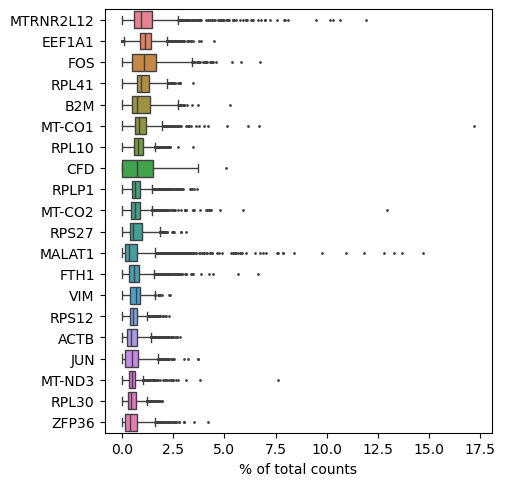

In [12]:
# Genes yeilding highest fraction of count cell wise

sc.pl.highest_expr_genes(adata,n_top=20)

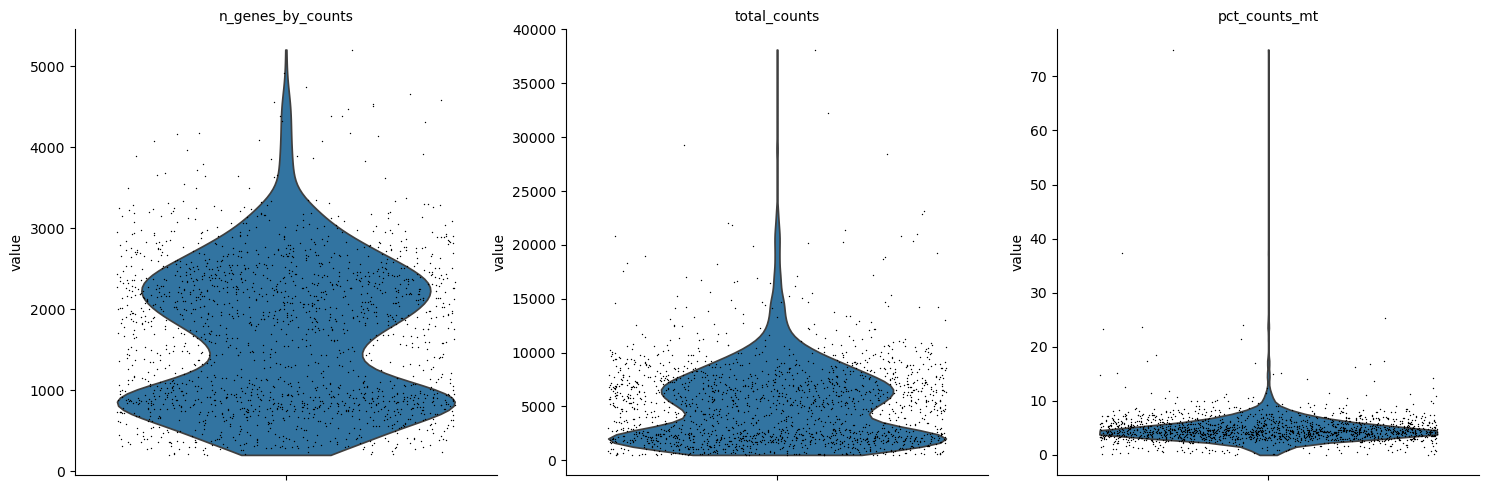

In [13]:
# Violin plot visualization of total counts vs gene vs mt count

sc.pl.violin(adata, ['n_genes_by_counts','total_counts','pct_counts_mt'],jitter=0.4,multi_panel=True)

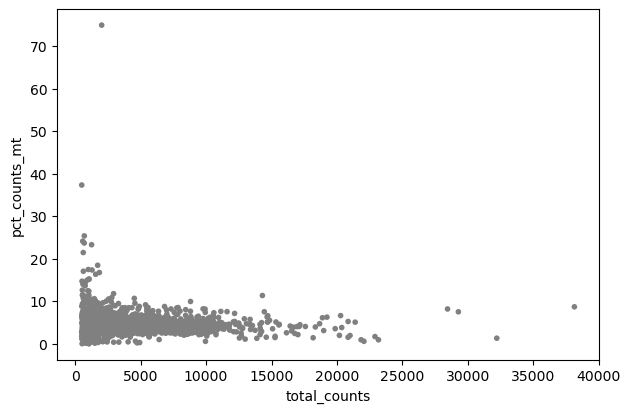

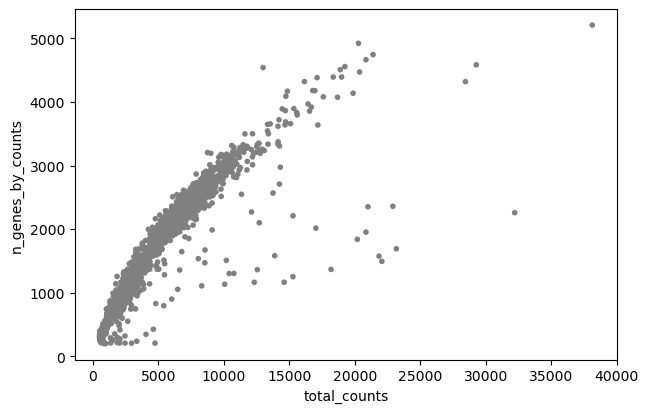

In [14]:
sc.pl.scatter(adata,x='total_counts',y='pct_counts_mt')
sc.pl.scatter(adata,x='total_counts',y='n_genes_by_counts')

In [15]:
# Filtering low quality cells on the basis of violin plots:
adata=adata[(adata.obs.n_genes_by_counts<3500) & (adata.obs.n_genes_by_counts > 600) & (adata.obs.pct_counts_mt < 10),:,].copy()


In [16]:
adata

AnnData object with n_obs × n_vars = 1574 × 16500
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'